#三軍總醫院北投分院統計及實驗設計課程之一  
## 2021/6/24
## ytai1123@gmail.com
### 使用方法:


1.   使用gmail帳號登入
2.   按"執行階段" -->"全部執行" 以執行全部內容, 若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。

###Galton Board 1
<img src="https://denniscooperblog.com/wp-content/uploads/2018/07/AggressiveAromaticBuckeyebutterfly-size_restricted.gif" width="750" align="center">

###Galton Board 2

<img src='https://indexplus.co/wp-content/uploads/2020/09/Galton-Board.gif' align='ceter'> 


In [ ]:
##0-1
!git clone https://github.com/YuehMintTai/RPython.git

Cloning into 'RPython'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 195 (delta 108), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (195/195), 1000.28 KiB | 4.95 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [ ]:
##0-2
!pip install rpy2

In [ ]:
##0-3
%load_ext rpy2.ipython

In [ ]:
##5-1
%%R
myData<-read.csv('RPython/samples.csv')
tail(myData,1)

    SID 性別 年齡 入伍前職業 教育程度 婚姻狀況 皆無過去病史01 早產兒01
188   4    1   25         商        4        1              1        0
    頭部曾受傷01 發展遲緩01 注意力不足過動症01 癲癇01 癲癇服藥治療 癲癇服藥期間
188            0          0                  0      0            0            0
    軍種 軍階 役別 入伍至今_年 聽過自殺課程_次 求助心輔_次 求助精神科_次
188    1    1    2         0.5               1           0             2
    使用1995_次 使用24h專線_次 特殊狀況 父母婚姻狀態 自殺意念_bsrs6 B型肝炎01
188           0              0        4            4              4         0
    C型肝炎01 氣喘史01 過敏史01 心臟病史01 高血壓01 醣尿病01 甲狀腺01 類風濕01
188         0        1        1          0        0        0        1        0
    重大意外01 自殺意念01 透露父母 透露手足 透露好友 透露同儕 透露長官 透露心輔
188          1          1        0        0        0        0        0        0
    透露醫師 拒告父母 拒告手足 拒告好友 拒告同儕 拒告長官 拒告心輔 拒告醫師
188        0        1        1        1        1        1        1        1
    BSRS總分 BSRSR總分 過動症總分 Inattention Impulsivity opposition depression
188       20         5         18           9           

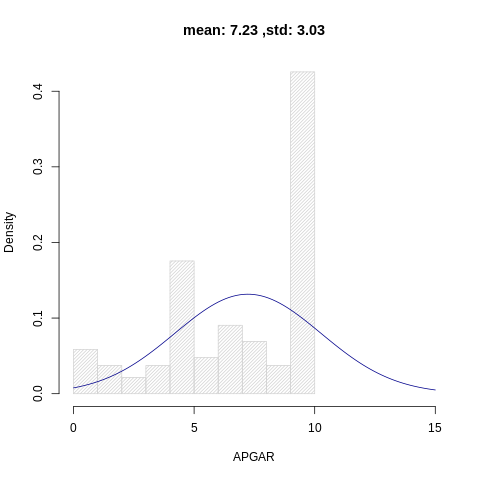

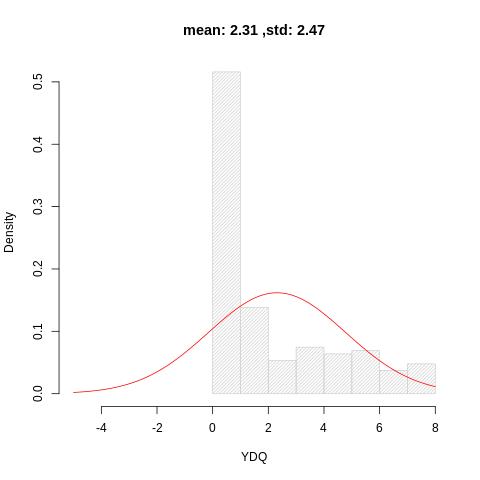

In [ ]:
##5-2
%%R
meanAPGAR<-mean(myData$家庭滿意度apgar)
stdAPGAR<-sqrt(var(myData$家庭滿意度apgar))
stdAPGAR
hist(myData$家庭滿意度apgar,xlab='APGAR',
     main=paste('mean:',toString(round(meanAPGAR,2)),',std:',toString(round(stdAPGAR,2))),
     density=30, prob=TRUE, xlim=c(0,15))
curve(dnorm(x,mean=meanAPGAR,sd=stdAPGAR), add=TRUE,col='darkblue')

meanYDQ<-mean(myData$網路成癮分數YDQ)
stdYDQ<-sqrt(var(myData$網路成癮分數YDQ))
hist(myData$網路成癮分數YDQ,xlab='YDQ',density=30, prob=TRUE,xlim=c(-5,8),
     main=paste('mean:',toString(round(meanYDQ,2)),',std:',toString(round(stdYDQ,2))))
curve(dnorm(x,mean=meanYDQ,sd=stdYDQ),add=TRUE,col='red')


Call:
glm(formula = formula1, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.8102  -2.3087   0.6913   2.4405   4.1961  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.81025    0.29807  26.202   <2e-16 ***
網路成癮分數YDQ -0.25080    0.08829  -2.841    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 8.858218)

    Null deviance: 1719.1  on 187  degrees of freedom
Residual deviance: 1647.6  on 186  degrees of freedom
AIC: 947.6

Number of Fisher Scoring iterations: 2



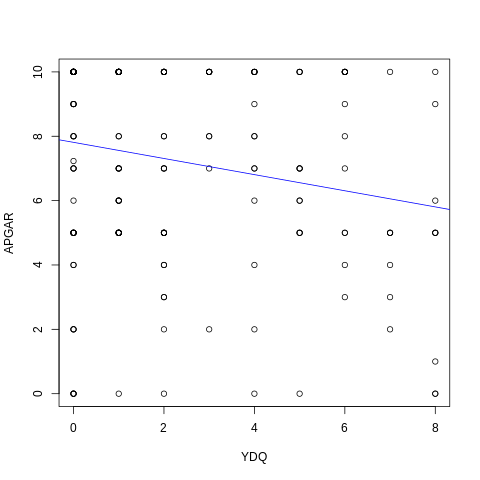

In [ ]:
##5-3
%%R
formula1<-'家庭滿意度apgar~網路成癮分數YDQ'
model1<-glm(formula1,myData, family='gaussian')
print(summary(model1))
plot(myData$網路成癮分數YDQ,myData$家庭滿意度apgar,xlab='YDQ',ylab='APGAR')
abline(model1,col='blue')


Call:
glm(formula = formula2, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5125  -1.8546  -0.8546   1.8138   6.1454  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.51255    0.45740   7.679 8.82e-13 ***
家庭滿意度apgar -0.16580    0.05836  -2.841    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.856059)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1089.2  on 186  degrees of freedom
AIC: 869.8

Number of Fisher Scoring iterations: 2



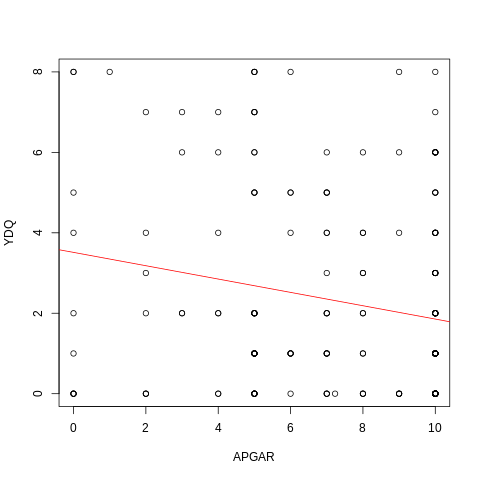

In [ ]:
##5-5
%%R
formula2<-'網路成癮分數YDQ~家庭滿意度apgar'
model2<-glm(formula2,myData, family='gaussian')
print(summary(model2))
plot(myData$家庭滿意度apgar,myData$網路成癮分數YDQ,xlab='APGAR',ylab='YDQ')
abline(model2,col='red')

In [ ]:
##5-6
%%R
apgar_z<-scale(myData$家庭滿意度apgar)
YDQ_z<-scale(myData$網路成癮分數YDQ)
formula1<-'apgar_z~YDQ_z'
model1<-glm(formula1,family='gaussian')
print(summary(model1))
formula2<-'YDQ_z~apgar_z'
model2<-glm(formula2,family='gaussian')
print(summary(model2))
print(cor(myData$家庭滿意度apgar,myData$網路成癮分數YDQ))
print(cor(myData$網路成癮分數YDQ,myData$家庭滿意度apgar))


Call:
glm(formula = formula1, family = "gaussian")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5759  -0.7614   0.2280   0.8049   1.3839  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  9.522e-17  7.159e-02   0.000    1.000   
YDQ_z       -2.039e-01  7.178e-02  -2.841    0.005 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.963571)

    Null deviance: 187.00  on 187  degrees of freedom
Residual deviance: 179.22  on 186  degrees of freedom
AIC: 530.53

Number of Fisher Scoring iterations: 2


Call:
glm(formula = formula2, family = "gaussian")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4248  -0.7523  -0.3466   0.7358   2.4928  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.206e-17  7.159e-02   0.000    1.000   
apgar_z     -2.039e-01  7.178e-02  -2.841    0.005 **
---
Signif. codes:  

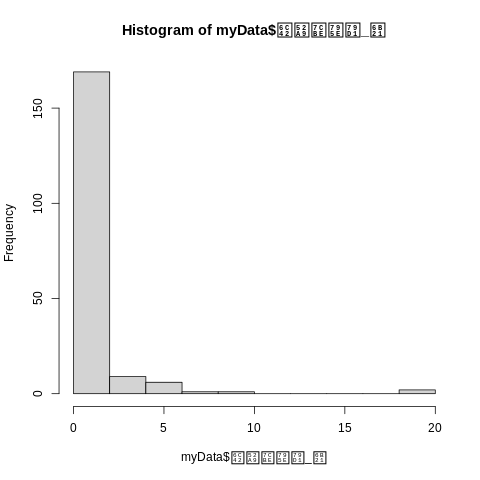

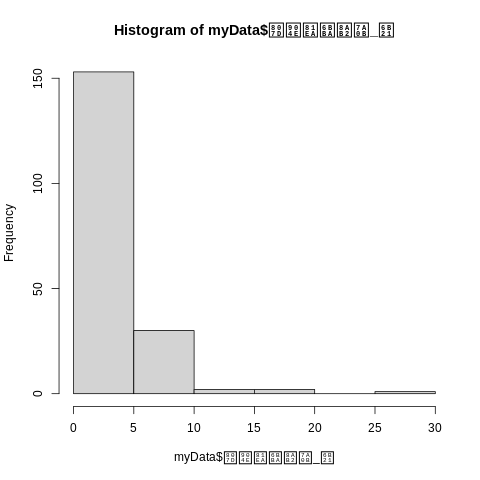

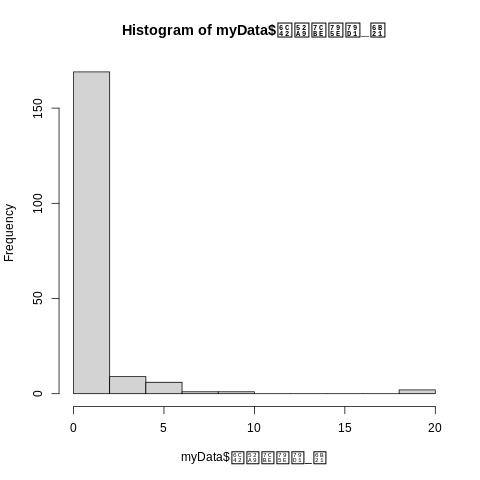

In [ ]:
##5-7
%%R
hist(myData$求助精神科_次)
hist(myData$聽過自殺課程_次)
hist(myData$求助精神科_次)

In [ ]:
##5-8
%%R
formula<-'求助精神科_次~depression+anxiety+as.factor(性別)'
model3<-glm(formula,myData,family='poisson')
print(summary(model3))
model4<-glm(formula,myData,family='gaussian')
print(summary(model4))


Call:
glm(formula = formula, family = "poisson", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5048  -1.0196  -0.7961   0.1068   8.7262  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.037534   0.235704  -8.644  < 2e-16 ***
depression        0.051433   0.006047   8.505  < 2e-16 ***
anxiety           0.036382   0.006475   5.619 1.92e-08 ***
as.factor(性別)2 -1.387183   0.390855  -3.549 0.000387 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 561.82  on 187  degrees of freedom
Residual deviance: 391.53  on 184  degrees of freedom
AIC: Inf

Number of Fisher Scoring iterations: 6


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8388  -0.8945  -0.2203   0.1281  18.4386  

Coefficients:
                 Estimate Std. Erro

In [ ]:
##5-9 Test for normality (是否符合常態分佈)
%%R
print(shapiro.test(myData$聽過自殺課程_次))
shapiro.test(myData$聽過自殺課程_次^.55)


	Shapiro-Wilk normality test

data:  myData$聽過自殺課程_次
W = 0.77537, p-value = 1.081e-15


	Shapiro-Wilk normality test

data:  myData$聽過自殺課程_次^0.55
W = 0.91018, p-value = 2.784e-09




Call:
glm(formula = formula, family = "binomial", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6566  -0.6349  -0.3651  -0.3242   2.4336  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.42723    0.51567   0.828    0.407    
網路成癮分數YDQ   0.08156    0.07970   1.023    0.306    
家庭滿意度apgar  -0.33467    0.06879  -4.865 1.15e-06 ***
as.factor(性別)2  0.01150    0.62750   0.018    0.985    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 180.71  on 187  degrees of freedom
Residual deviance: 148.95  on 184  degrees of freedom
AIC: 156.95

Number of Fisher Scoring iterations: 5



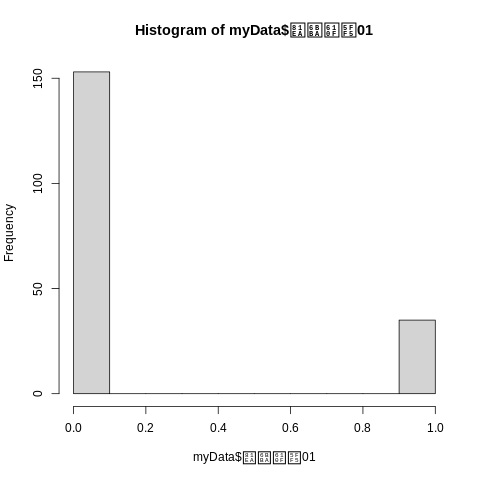

In [ ]:
##5-10
%%R
##由於發現有輸入時的錯誤,以致自殺意念01有小數點的錯誤..
myData$自殺意念01=as.integer(myData$自殺意念01)
hist(myData$自殺意念01)
formula='自殺意念01~網路成癮分數YDQ+家庭滿意度apgar+as.factor(性別)'
model5<-glm(formula,myData,family='binomial')
summary(model5)

In [ ]:
##5-11
%%R
formula='自殺意念01~網路成癮分數YDQ+家庭滿意度apgar+as.factor(性別)'
model5<-glm(formula,myData,family='binomial')
summary(model5)


Call:
glm(formula = formula, family = "binomial", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6566  -0.6349  -0.3651  -0.3242   2.4336  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.42723    0.51567   0.828    0.407    
網路成癮分數YDQ   0.08156    0.07970   1.023    0.306    
家庭滿意度apgar  -0.33467    0.06879  -4.865 1.15e-06 ***
as.factor(性別)2  0.01150    0.62750   0.018    0.985    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 180.71  on 187  degrees of freedom
Residual deviance: 148.95  on 184  degrees of freedom
AIC: 156.95

Number of Fisher Scoring iterations: 5



In [ ]:
##5-12-1 Logistic regression in Python statemodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
df=pd.read_csv('RPython/samples.csv')
y=df.自殺意念01.astype(int)
formula='自殺意念01.astype(int)~網路成癮分數YDQ+家庭滿意度apgar+C(性別)'
model7=smf.logit(formula=formula,data=df)
result=model7.fit()
result.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.396135
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     自殺意念01.astype(int)   No. Observations:                  188
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                  0.1758
Time:                        00:22:20   Log-Likelihood:                -74.473
converged:                       True   LL-Null:                       -90.357
Covariance Type:            nonrobust   LLR p-value:                 5.860e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4272      0.516      0.828      0.407      -0.583       1.438
C(性別)[T.2]     0.0115      0.627      0.018      0.985      -1.218       1.241
網路成癮分數YDQ      0.0816      0.080      1.023      0.306      -0.075       0.238
家庭滿意度apgar    -0.3347      0.069     -4.865      0.000      -0.470      -0.200
==============================================================================
"""

In [ ]:
##5-13 sklearn regression model with dummy variables...
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('RPython/samples.csv')
y=df['自殺意念01'].astype(int)
df['sex']='男'
df.loc[df.性別==2,'sex']='女'
df.loc[df.性別=='N/A','sex']=np.nan
x=df[['網路成癮分數YDQ','家庭滿意度apgar','sex']]
x=pd.get_dummies(data=x, drop_first=True)
x.head()
model6=LogisticRegression()
result=model6.fit(x,y)
print('='*10)
print('迴歸係數:'+str(result.coef_))
print('='*10)
print('截距:'+str(result.intercept_))

迴歸係數:[[ 0.08116804 -0.33311388 -0.00720934]]
截距:[0.42741261]


In [ ]:
##5-10 R logistic regression with dummy variable and link="logit"
%%R
myData$自殺意念01<-as.integer(myData$自殺意念01)
myData$性別<-relevel(factor(myData$性別),ref='2')
formula='自殺意念01~網路成癮分數YDQ+家庭滿意度apgar+as.factor(性別)'
model7<-glm(formula,myData,family=binomial(link="logit"))
##print(summary(model7))
print(exp(coef(model7)))
exp(cbind(OR=coef(model7), confint(model7)))

     (Intercept)  網路成癮分數YDQ  家庭滿意度apgar as.factor(性別)1 
       1.5507344        1.0849822        0.7155760        0.9885645 


R[write to console]: Waiting for profiling to be done...



                        OR     2.5 %    97.5 %
(Intercept)      1.5507344 0.3391747 6.4229119
網路成癮分數YDQ  1.0849822 0.9261746 1.2685357
家庭滿意度apgar  0.7155760 0.6204842 0.8143471
as.factor(性別)1 0.9885645 0.3092494 3.8319996


In [ ]:
##5-11 Sklearn logistic regression with LabelEncoder
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('RPython/samples.csv')
y=df['自殺意念01'].astype(int)
df['sex']='男'
df.loc[df.性別==2,'sex']='女'
label_encoder=preprocessing.LabelEncoder()
encoded_sex=label_encoder.fit_transform(df['sex'])
x=pd.DataFrame([df['網路成癮分數YDQ'],df['家庭滿意度apgar'],encoded_sex]).T
model8=LogisticRegression()
result=model8.fit(x,y)
np.exp(result.coef_)

array([[1.08455313, 0.71668857, 0.99281658]])

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('class05.ipynb ')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
ytai1123@gmail.com


ValueError: ignored